<a href="https://colab.research.google.com/github/AnusreeMandal/twitter-sentiment-analysis/blob/main/TWEETSANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets torch scikit-learn pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset


In [ ]:
# Load dataset
file_path = "/content/twitter_data.csv"
df = pd.read_csv(file_path)
df



,id_str,polished_text,user_id_str,user_name,user_screen_name,user_verified,user_followers_count,user_friends_count,place,description,created_at_date,created_at_time,claim,sentiments
0,1.360000e+18,Khohlwani nge LAND. Belong to all who live in...,9.300000e+17,Mother-Continent,IndWorldThinker,False,30656,2734,NaN,We are thinkers. Let's think independently and...,30-01-2021,22:42:34,NaN,-1.0
1,1.340000e+18,Iowas four Catholic Bishops issue statement en...,1.484909e+07,KCRG-TV9,KCRG,True,98091,1166,NaN,Your 24-Hour News Source. Covering Cedar Rapid...,07-12-2020,03:16:00,1.0,0.0
2,1.380000e+18,We added nearly 170k Covid cases yesterday. No...,5.871672e+06,Rohan Venkat,RohanV,True,24786,5691,NaN,"Associate Editor, @scroll_in || Check out @Scr...",12-04-2021,04:00:48,NaN,0.0
3,1.360000e+18,Skin care and bath products are benefiting fro...,2.006728e+07,Drug Store News,DrugStoreNews,False,11875,888,NaN,Reporting on the retail pharmacy industry,17-02-2021,14:49:03,NaN,1.0
4,1.310000e+18,The secret to Australias success in beating th...,3.088796e+09,Latest Commentary,LatestComments,False,14635,284,NaN,We carry constant updates on the latest news a...,01-10-2020,12:07:17,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.330000e+18,I tell you whats fun is Section 8 deciding my ...,1.126807e+09,Eb Chew Toy of Puppies,EbThen,False,13747,850,NaN,Autistic. Disabled. Bi. Grey-ace. Demi-aro. Fi...,29-11-2020,18:26:56,NaN,NaN
4996,1.370000e+18,"Do you work MF? School employees, child care p...",2.282787e+09,Tampa Bay Family,TampaBayFamily,False,18439,17609,NaN,The Greater Tampa Bay Area. Population: 4.7 mi...,05-03-2021,23:31:38,NaN,NaN
4997,1.330000e+18,: Shameless: How COVID Upended the Final Seas...,7.160000e+17,Mateaâï¸,matead37,False,20068,969,NaN,ðððððð â¢ ððððð...,04-12-2020,20:05:22,0.0,NaN
4998,1.380000e+18,Great data from the UK the vaccines are perfor...,4.178934e+08,Dave O'Grady,DaveOGrady1,True,20768,8908,NaN,From sports journalist to airline man! Love di...,15-04-2021,11:14:41,NaN,NaN


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_str                5000 non-null   float64
 1   polished_text         5000 non-null   object 
 2   user_id_str           5000 non-null   float64
 3   user_name             5000 non-null   object 
 4   user_screen_name      5000 non-null   object 
 5   user_verified         5000 non-null   bool   
 6   user_followers_count  5000 non-null   int64  
 7   user_friends_count    5000 non-null   int64  
 8   place                 49 non-null     object 
 9   description           4959 non-null   object 
 10  created_at_date       4551 non-null   object 
 11  created_at_time       4551 non-null   object 
 12  claim                 2530 non-null   float64
 13  sentiments            121 non-null    float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 512.8+ KB


,id_str,polished_text,user_id_str,user_name,user_screen_name,user_verified,user_followers_count,user_friends_count,place,description,created_at_date,created_at_time,claim,sentiments
0,1.360000e+18,Khohlwani nge LAND. Belong to all who live in...,9.300000e+17,Mother-Continent,IndWorldThinker,False,30656,2734,NaN,We are thinkers. Let's think independently and...,30-01-2021,22:42:34,NaN,-1.0
1,1.340000e+18,Iowas four Catholic Bishops issue statement en...,1.484909e+07,KCRG-TV9,KCRG,True,98091,1166,NaN,Your 24-Hour News Source. Covering Cedar Rapid...,07-12-2020,03:16:00,1.0,0.0
2,1.380000e+18,We added nearly 170k Covid cases yesterday. No...,5.871672e+06,Rohan Venkat,RohanV,True,24786,5691,NaN,"Associate Editor, @scroll_in || Check out @Scr...",12-04-2021,04:00:48,NaN,0.0
3,1.360000e+18,Skin care and bath products are benefiting fro...,2.006728e+07,Drug Store News,DrugStoreNews,False,11875,888,NaN,Reporting on the retail pharmacy industry,17-02-2021,14:49:03,NaN,1.0
4,1.310000e+18,The secret to Australias success in beating th...,3.088796e+09,Latest Commentary,LatestComments,False,14635,284,NaN,We carry constant updates on the latest news a...,01-10-2020,12:07:17,1.0,1.0


In [ ]:
df = df[['polished_text', 'sentiments']]

# Drop missing values (if any)
df = df.dropna()

# Ensure sentiments are stored as integers
df['sentiments'] = df['sentiments'].astype(int)

# Display first few rows
print(df.head())

# Check unique sentiment values
print("Unique Sentiment Labels:", df['sentiments'].unique())

# Count of each sentiment label
print(df['sentiments'].value_counts())


                                       polished_text  sentiments
0   Khohlwani nge LAND. Belong to all who live in...          -1
1  Iowas four Catholic Bishops issue statement en...           0
2  We added nearly 170k Covid cases yesterday. No...           0
3  Skin care and bath products are benefiting fro...           1
4  The secret to Australias success in beating th...           1
Unique Sentiment Labels: [-1  0  1]
sentiments
 0    51
-1    43
 1    27
Name: count, dtype: int64


<ipython-input-6-9f8df4da0de6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiments'], palette="viridis")


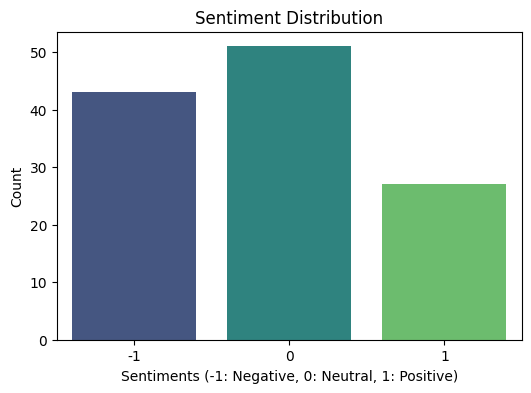

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['sentiments'], palette="viridis")

# Label the plot
plt.title("Sentiment Distribution")
plt.xlabel("Sentiments (-1: Negative, 0: Neutral, 1: Positive)")
plt.ylabel("Count")

# Show the plot
plt.show()

In [ ]:
label_counts= df['sentiments'].value_counts()
#getting the number of rows to drop from the majority class

rows_to_drop = label_counts.max() - label_counts.min()

#drop rows from majority class randomly

if rows_to_drop > 0:
    data_majority =df[df["sentiments"] == 1]
    data_balanced =df.drop(data_majority.sample(rows_to_drop).index)

else :
  data_balanced=df.copy()

#check the new class balance

print(data_balanced["sentiments"].value_counts())

sentiments
 0    51
-1    43
 1     3
Name: count, dtype: int64


# DATA PREPROCESSING


In [ ]:
import re

def clean_text(text):

  #Remove special characters and punctuations

  text = re.sub(r"[^\w\s]", " ", text)

 #remove single characters

  text = re.sub(r"\b[a-zA-Z]\b"," ", text)

 #remove HTML tags

  text =re.sub(r"<[^>]*>", " ", text)

 #lowercase the text
  text = text.lower()

 # remove extra whitespace
  text =re.sub(r"\s+"," ", text)

 #trim loading and trailing spaces

  text = text.strip()

  return text


In [ ]:
import pandas as pd
#extract the polished_text column as a list

tweets = data_balanced['polished_text'].tolist()

#clean the text in the list
cleaned_tweets=[clean_text(polished_text) for polished_text in tweets]

#add the cleaned tweets as a new column to the dataframe

data_balanced['clean_tweets']= cleaned_tweets




In [ ]:
data_balanced

,polished_text,sentiments,clean_tweets
0,Khohlwani nge LAND. Belong to all who live in...,-1,khohlwani nge land belong to all who live in i...
1,Iowas four Catholic Bishops issue statement en...,0,iowas four catholic bishops issue statement en...
2,We added nearly 170k Covid cases yesterday. No...,0,we added nearly 170k covid cases yesterday now...
4,The secret to Australias success in beating th...,1,the secret to australias success in beating th...
5,CNN on Victorian Premier Dan Andrews lockdown ...,0,cnn on victorian premier dan andrews lockdown ...
...,...,...,...
116,MORE European countries receiving 1st shipmen...,0,more european countries receiving 1st shipment...
117,Hospitalisation rates rose 30 in a week in the...,-1,hospitalisation rates rose 30 in week in the t...
118,This is real: Wisconsin bar owner details COVI...,-1,this is real wisconsin bar owner details covid...
119,"So far, the FDA has fully approved remdesivir,...",0,so far the fda has fully approved remdesivir w...


# Data Splitting

In [ ]:
import pandas as pd

total_rows =len(data_balanced)
test_size  =int (total_rows *0.95)

#Randomly sample train_size rows for the training set

test_set =data_balanced.sample(test_size)

# Get the remaining rows for the test set

train_set= data_balanced.drop(test_set.index)



# Sentiment With LLM

# Setting Up Gemini API

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
#Necessary packages

import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text= text.replace('*', '  *')
  return Markdown(textwrap.indent(text,'> ', predicate=lambda _: True))


  #Used to securely store the API KEY
from google.colab import userdata


In [ ]:
#Or Use "os.getenv('GOOGLE_API_KEY)" to fetch an environment variable

GOOGLE_API_KEY =userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/learnlm-1.5-pro-experimental
models/gemma-3-27b-it


In [ ]:
model = genai.GenerativeModel( 'gemini-2.0-flash')

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?")
to_markdown(response.text)

CPU times: user 44.2 ms, sys: 7.2 ms, total: 51.4 ms
Wall time: 7.57 s


> Ah, the million-dollar question! The meaning of life is one of the most pondered and debated topics throughout human history. There's no single, universally accepted answer, and that's kind of the point.
> 
> Here's a breakdown of why it's so complex and some common perspectives:
> 
>   *  *Why there's no easy answer:  *  *
> 
>   *     *  *Subjectivity:  *  * Meaning is often deeply personal. What gives one person's life purpose might be meaningless to another.
>   *     *  *Philosophical Schools of Thought:  *  * Different philosophies offer wildly different explanations.
>   *     *  *Evolutionary Biology:  *  * From a purely biological standpoint, the "meaning" is survival and reproduction. But that doesn't feel very satisfying to many people.
>   *     *  *Existentialism:  *  * This philosophy argues that there is no inherent meaning. We are born into a meaningless world and must create our own meaning through our choices and actions.
> 
>   *  *Common Perspectives and Approaches:  *  *
> 
>   *     *  *Nihilism:  *  * The belief that life is inherently without meaning, purpose, or intrinsic value. It can be a bit depressing, but some find freedom in accepting this and living without the pressure of a grand purpose.
>   *     *  *Hedonism:  *  * The pursuit of pleasure and avoidance of pain as the ultimate goal. While tempting, a life solely dedicated to pleasure can often feel empty.
>   *     *  *Purpose-Driven Life:  *  * Finding a cause or goal that motivates you. This could be anything from fighting for social justice to creating art to raising a family.
>   *     *  *Relationships and Connection:  *  * Finding meaning through love, friendship, and community. Building strong bonds with others can provide a sense of belonging and purpose.
>   *     *  *Contribution and Service:  *  * Making a positive impact on the world, even in small ways. This could involve volunteering, helping others, or working towards a better future.
>   *     *  *Spiritual or Religious Beliefs:  *  * Many religions offer a framework for understanding life's purpose, often centered around serving a higher power or following a divine plan.
>   *     *  *Growth and Learning:  *  * Continuously striving to learn, grow, and become a better version of yourself. This can involve pursuing knowledge, developing skills, and overcoming challenges.
>   *     *  *Mindfulness and Presence:  *  * Focusing on the present moment and appreciating the simple joys of life. This can help you find meaning in everyday experiences.
>   *     *  *Creating Meaning:  *  * Recognizing that meaning is not something to be found, but something to be created. This involves actively choosing your values, setting goals, and living in alignment with what you believe is important.
> 
>   *  *In short, the meaning of life is what you make it. It's a journey of exploration and discovery, not a destination to be reached.  *  *
> 
>   *  *Here are some questions to consider in your own search for meaning:  *  *
> 
>   *   What are you passionate about?
>   *   What values are most important to you?
>   *   What impact do you want to have on the world?
>   *   What brings you joy and fulfillment?
>   *   What makes you feel connected to something larger than yourself?
> 
> Ultimately, the answer to the question "What is the meaning of life?" is a deeply personal one. The best way to find your answer is to explore different possibilities, experiment with different ways of living, and reflect on your own experiences. Good luck on your journey!


# Single API Call

In [ ]:
test_set_sample = test_set.sample(20)

test_set_sample[ 'pred_label' ] = ' '

test_set_sample

,polished_text,sentiments,clean_tweets,pred_label
23,Im behind 126.5 million people for the CovidVa...,0,im behind 126 5 million people for the covidva...,
62,...,-1,yep felt something coming coming didnt know it...,
100,Without a lockdown or prolonged circuit breake...,-1,without lockdown or prolonged circuit breaker ...,
50,. amp; President Xi also exchanged views on co...,0,amp president xi also exchanged views on count...,
66,"responsible for a dramatic COVID19 surge, an...",-1,responsible for dramatic covid19 surge and ign...,
67,"Tyson Foods, already in hot water for reckless...",-1,tyson foods already in hot water for reckless ...,
117,Hospitalisation rates rose 30 in a week in the...,-1,hospitalisation rates rose 30 in week in the t...,
75,One agency found a possible link between Johns...,-1,one agency found possible link between johnson...,
90,My Christmas lockdown labours poured into this...,0,my christmas lockdown labours poured into this...,
54,"On this day, some 21 years ago on some tiny is...",0,on this day some 21 years ago on some tiny isl...,


In [ ]:
#convert dataframe to json using to_json() method

json_data = test_set_sample[['clean_tweets','pred_label']].to_json(orient='records')

#Print the JSON data

print(json_data)

[{"clean_tweets":"im behind 126 5 million people for the covidvaccine my mom nurse is behind very few interesting work by","pred_label":" "},{"clean_tweets":"yep felt something coming coming didnt know it was going to be pandemic but knew they were going to take trump out some way some how knew bernie was going to get screwed by the dems in the primaries again amp knew biden was going to win with outside corrupt help","pred_label":" "},{"clean_tweets":"without lockdown or prolonged circuit breaker we are really going to see the rest of the country get into the same trouble that the nw york and the ne are in now says sage member calum semple","pred_label":" "},{"clean_tweets":"amp president xi also exchanged views on countering the covid19 pandemic and the shared challenges of global health security climate change and preventing weapons proliferation","pred_label":" "},{"clean_tweets":"responsible for dramatic covid19 surge and ignoring worsening homelessness crisis could learn lot from

In [ ]:
prompt = f"""
You are an expert linguist, with a deep knowlegde of social media language and emotions ,who is good at classifying twitter sentiments into postive , negative and neutral labels.
Help me classify tweets during the COVID period into three categories: Postive(label=1), Neutral(label=0)and Negative(label=-1).
Tweets are provided between three backticks.
In your output, only return the Json code as output - which is provided between three backticks.
Your Task is to update the predicted models under 'pred_label' in the Json code.
do not make any changes to the Json code format.

```
{json_data}
```
"""

print(prompt)




You are an expert linguist, with a deep knowlegde of social media language and emotions ,who is good at classifying twitter sentiments into postive , negative and neutral labels.
Help me classify tweets during the COVID period into three categories: Postive(label=1), Neutral(label=0)and Negative(label=-1).
Tweets are provided between three backticks.
In your output, only return the Json code as output - which is provided between three backticks.
Your Task is to update the predicted models under 'pred_label' in the Json code.
do not make any changes to the Json code format.

```
[{"clean_tweets":"im behind 126 5 million people for the covidvaccine my mom nurse is behind very few interesting work by","pred_label":" "},{"clean_tweets":"yep felt something coming coming didnt know it was going to be pandemic but knew they were going to take trump out some way some how knew bernie was going to get screwed by the dems in the primaries again amp knew biden was going to win with outside corrup

In [ ]:
response = model.gener